<a href="https://colab.research.google.com/github/Hesam-AI/house-price-prediction/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Scenario – House Price Prediction**

Client: UrbanSpace Realty – A nationwide real estate company

UrbanSpace Realty is looking to expand into new neighborhoods across the United States. In order to optimize their pricing strategy and better serve clients, they’ve provided a dataset containing information on 5,000 residential properties.

As a data analyst and machine learning engineer, your task is to:

Analyze the socioeconomic and demographic factors influencing home prices

Build a predictive model using Linear Regression

Evaluate the accuracy and performance of your model

Deliver clear insights and recommendations

#Project Objective
Predict house prices based on variables such as:

Average Area Income

Average Area House Age

Average Area Number of Rooms

Average Area Number of Bedrooms

Area Population

# Dataset Overview
Size: 5,000 rows × 7 columns

Source: USA Housing Dataset

Target variable: Price

Format: CSV

# Output
Exploratory Data Analysis (EDA)

Correlation heatmaps and visualizations

Linear Regression model

Model evaluation metrics (MSE, R² Score)

Conclusion and possible next steps



In [8]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [9]:
# Load dataset
df=pd.read_csv('USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [10]:
# Data overview
df.describe()
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


,0
Avg. Area Income,0
Avg. Area House Age,0
Avg. Area Number of Rooms,0
Avg. Area Number of Bedrooms,0
Area Population,0
Price,0
Address,0


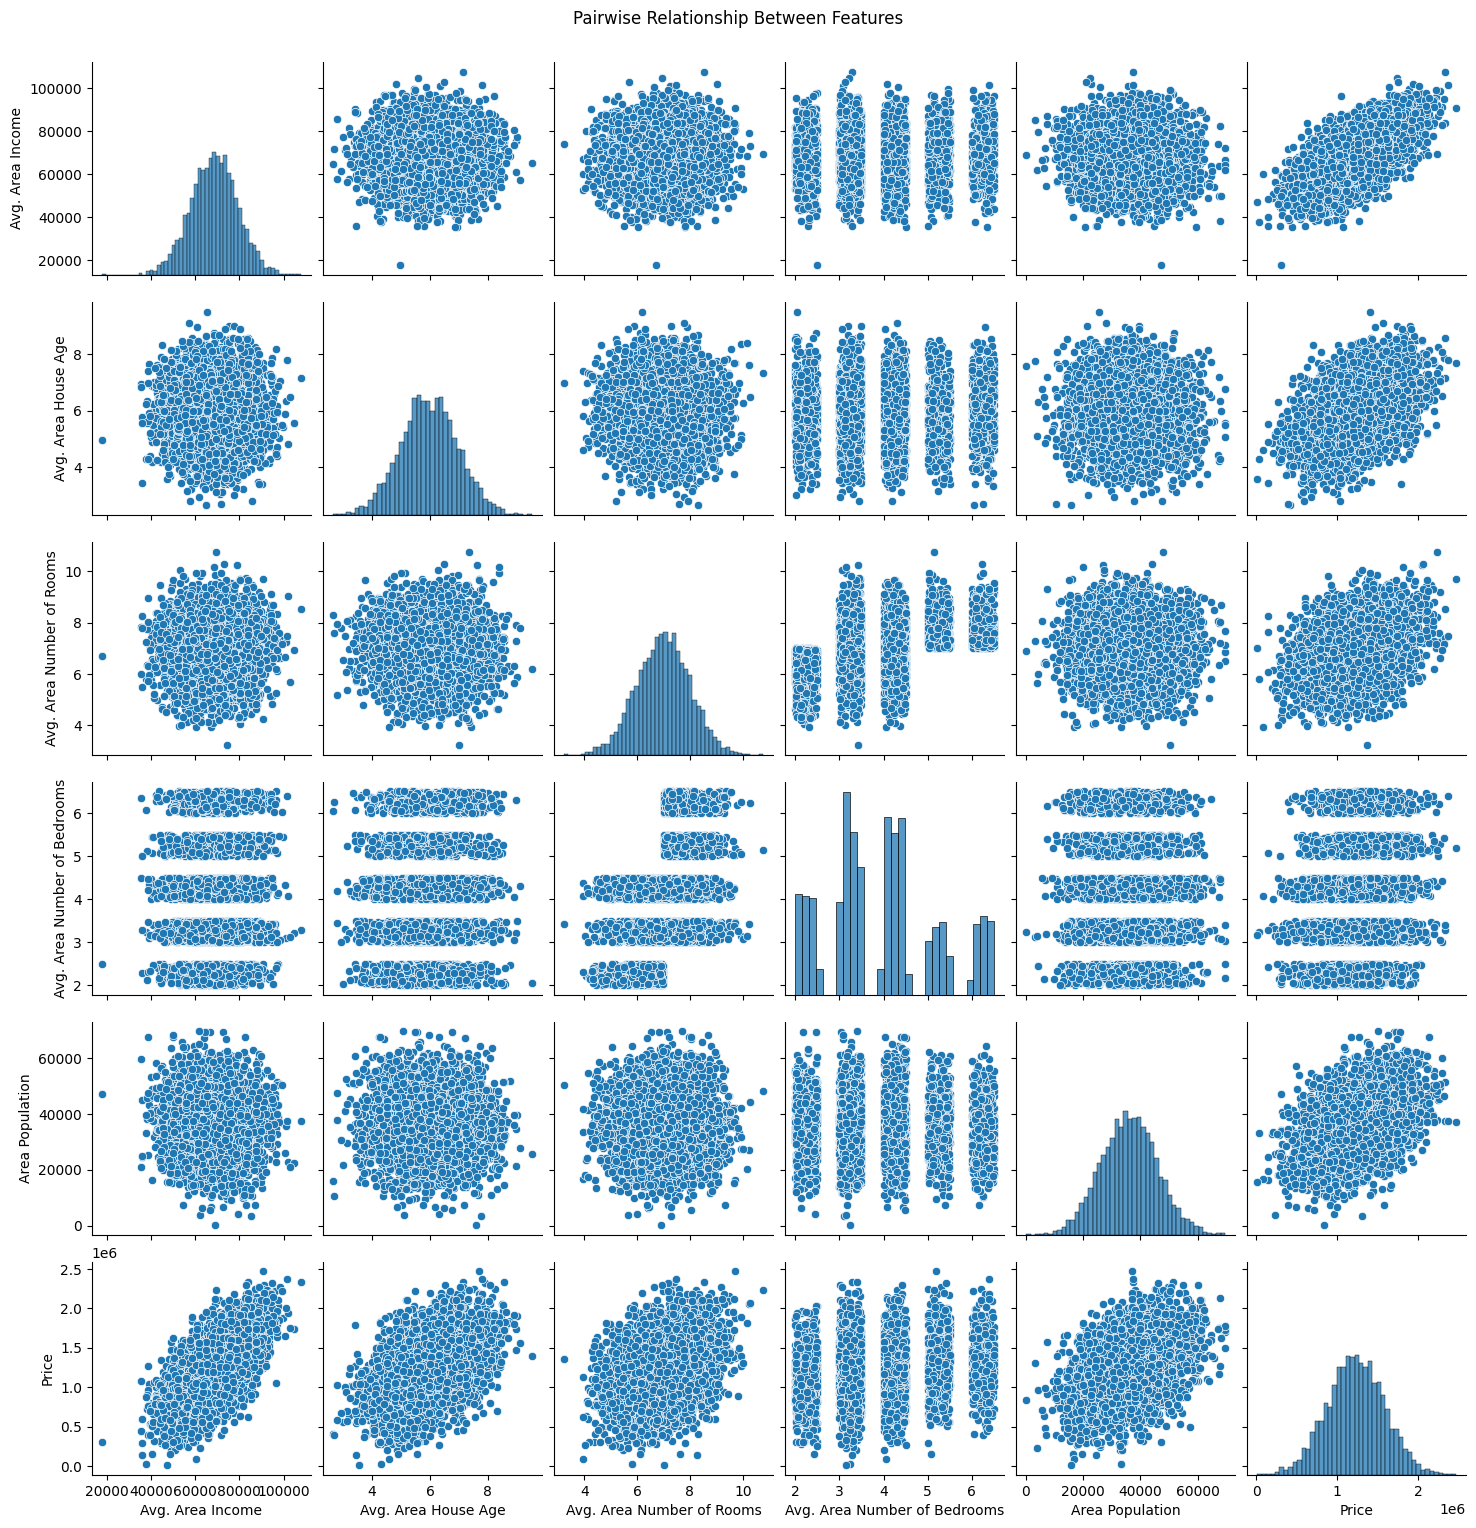

In [12]:
# Visualize pairwise relationships
sns. pairplot(df)
plt.suptitle("Pairwise Relationship Between Features", y=1.02)
plt.show()

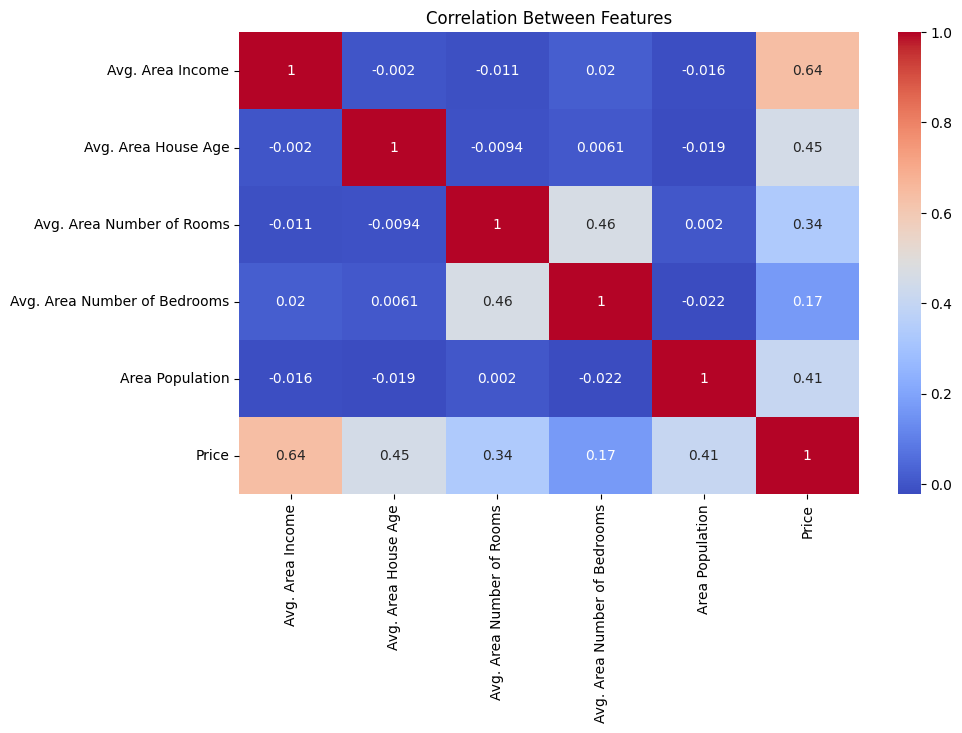

In [25]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap (df.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Features")
plt.show()

In [26]:
# Define features and target variable
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
        'Avg. Area Number of Bedrooms', 'Area Population']]
y=df['Price']

In [30]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Build and train the linear regression model
model = LinearRegression ()
model.fit(X_train, y_train)

LinearRegression()

In [33]:
# Make predictions and evaluate model performance
y_pred = model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("Mean Squared Erros (MSE): ", mse)
print("R2 Score:",r2)

Mean Squared Erros (MSE):  10089009300.894518
R2 Score: 0.9179971706834289


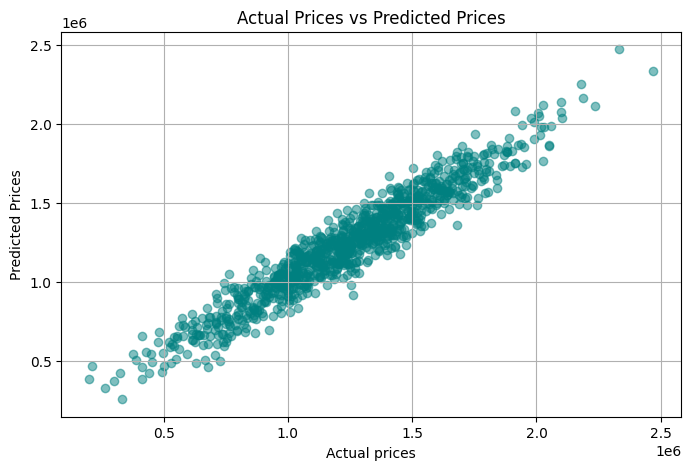

In [35]:
# Visualizing Actual vs Predicted
plt.figure(figsize=(8,5))
plt.scatter(y_test,y_pred,alpha=0.5 , color= 'teal')
plt.xlabel("Actual prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.grid(True)
plt.show()